In [31]:
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# For Data Manipulation
import numpy as np 
import pandas as pd
import sklearn
from itertools import cycle

df = pd.read_csv('winequality-red.csv',sep =';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


5    42.589118
6    39.899937
7    12.445278
4     3.314572
8     1.125704
3     0.625391
Name: quality, dtype: float64


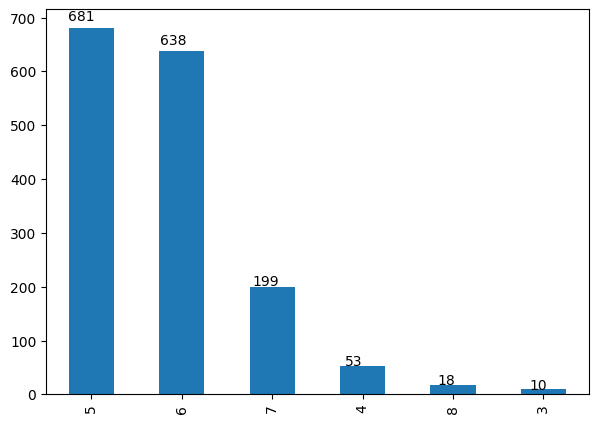

In [3]:
ax = df["quality"].value_counts().plot.bar(figsize=(7,5))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.02, p.get_height() * 1.02))
    
print(df["quality"].value_counts(normalize=True)*100)

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

0    86.429018
1    13.570982
Name: is good, dtype: float64


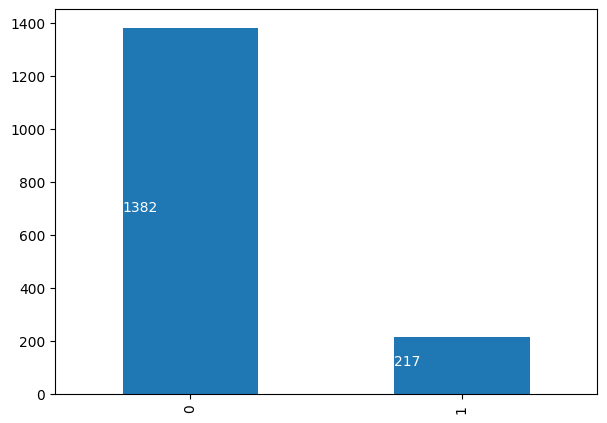

In [6]:
df["is good"] = 0
df.loc[df["quality"]>=7,"is good"] = 1
ax = df["is good"].value_counts().plot.bar(figsize=(7,5))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 0.5), color="white")
    
print(df["is good"].value_counts(normalize=True)*100)

In [7]:
features = df.columns[:-2]
output = df.columns[-1]
print("Features: \n{}, \n\nLabels: \n{}".format(features.values,output))

Features: 
['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol'], 

Labels: 
is good


In [8]:
for f in features:
    print('Feature:{}\n Skew = {} \n\n'.format(f,df[f].skew()))

Feature:fixed acidity
 Skew = 0.9827514413284587 


Feature:volatile acidity
 Skew = 0.6715925723840199 


Feature:citric acid
 Skew = 0.3183372952546368 


Feature:residual sugar
 Skew = 4.54065542590319 


Feature:chlorides
 Skew = 5.680346571971724 


Feature:free sulfur dioxide
 Skew = 1.250567293314441 


Feature:total sulfur dioxide
 Skew = 1.515531257594554 


Feature:density
 Skew = 0.07128766294927483 


Feature:pH
 Skew = 0.19368349811284427 


Feature:sulphates
 Skew = 2.4286723536602945 


Feature:alcohol
 Skew = 0.8608288068888538 




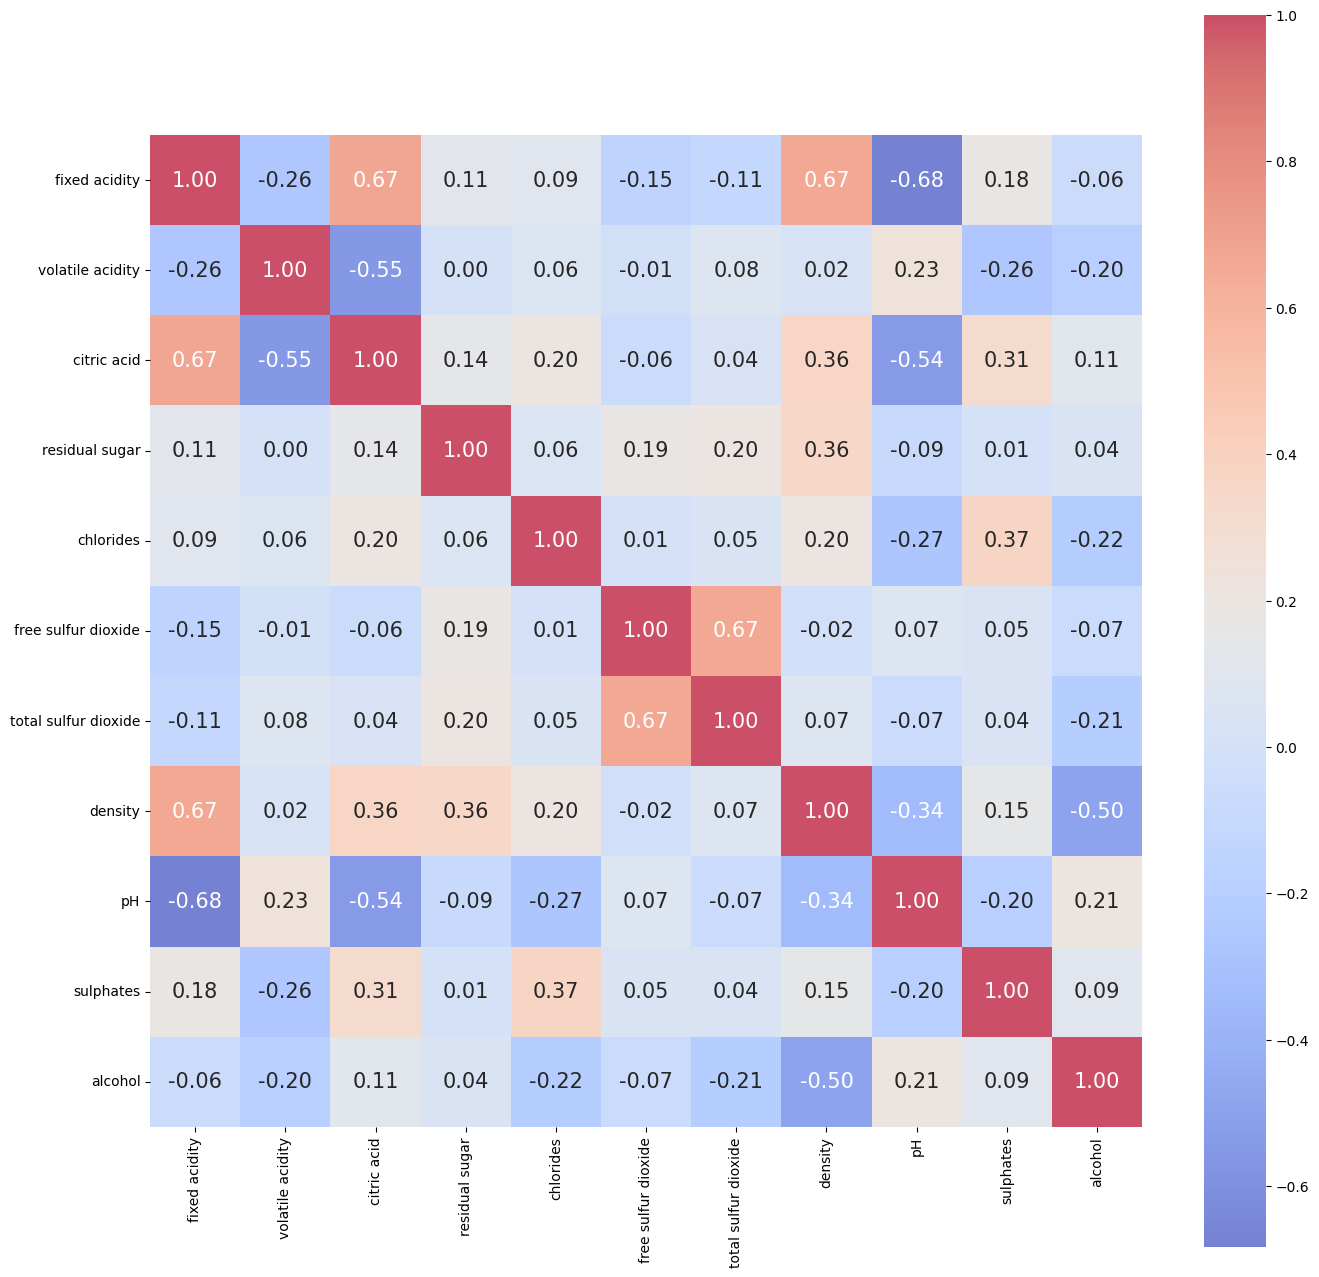

In [9]:

corr = df[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

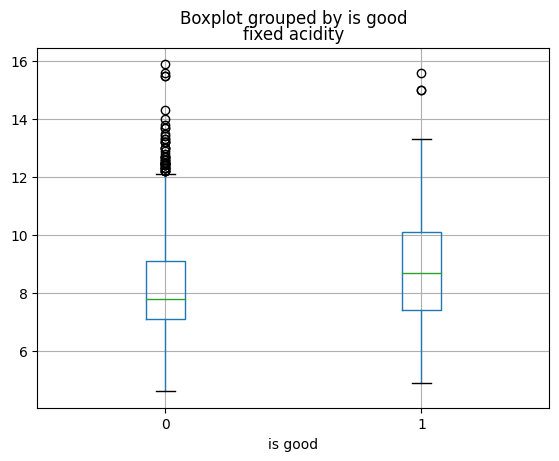

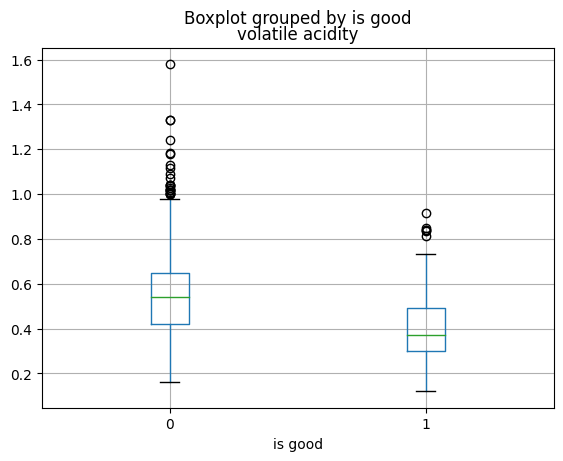

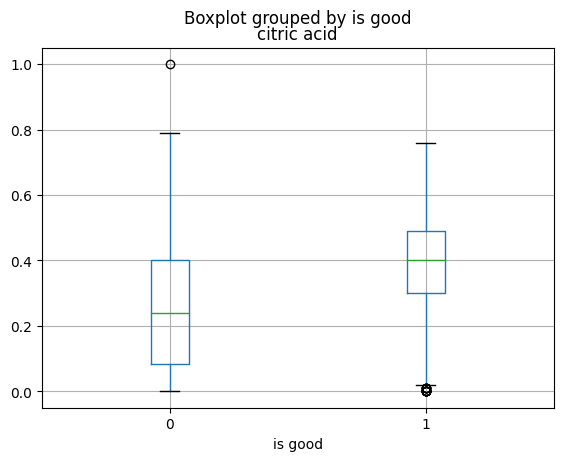

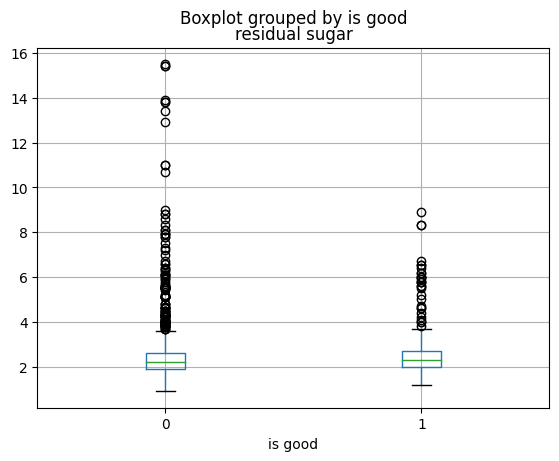

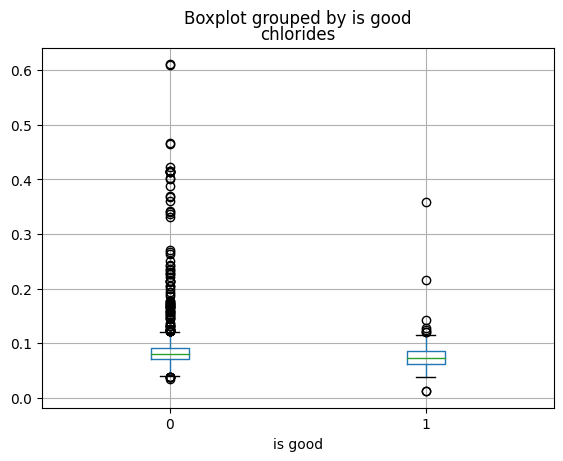

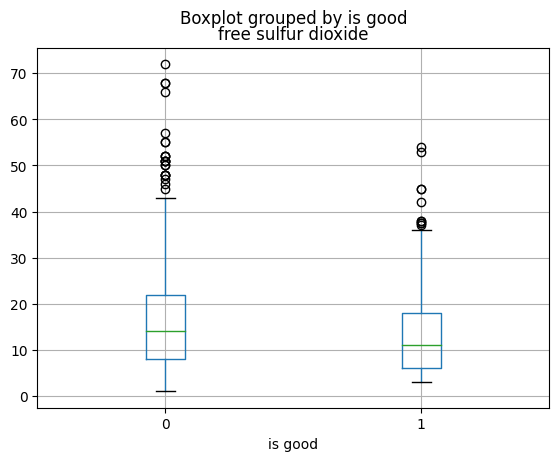

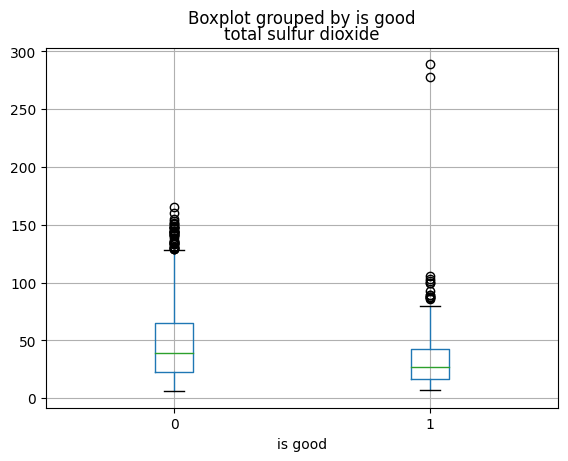

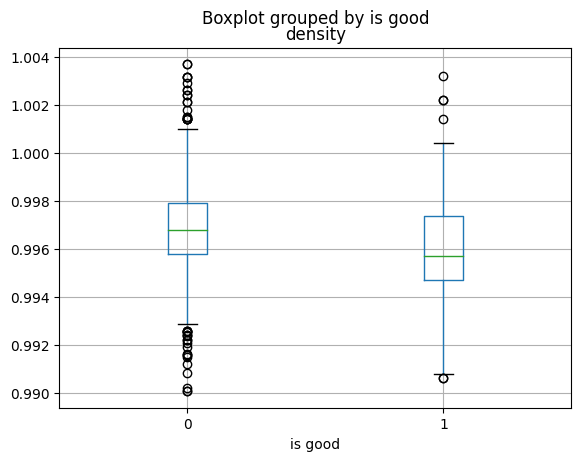

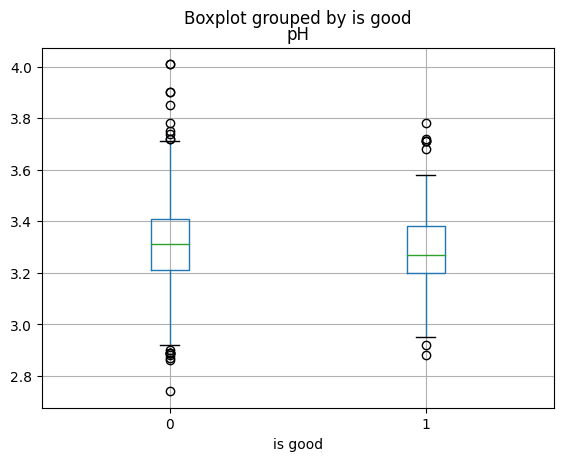

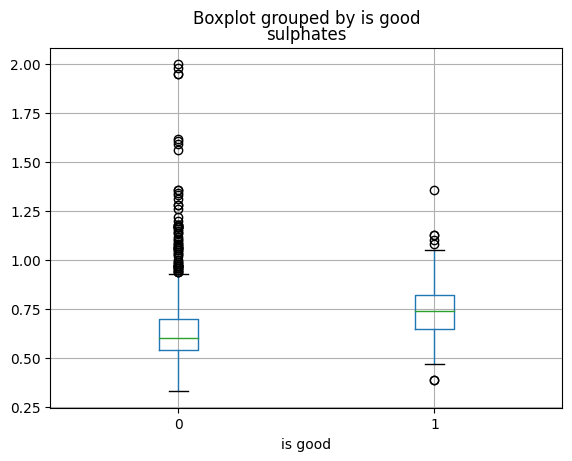

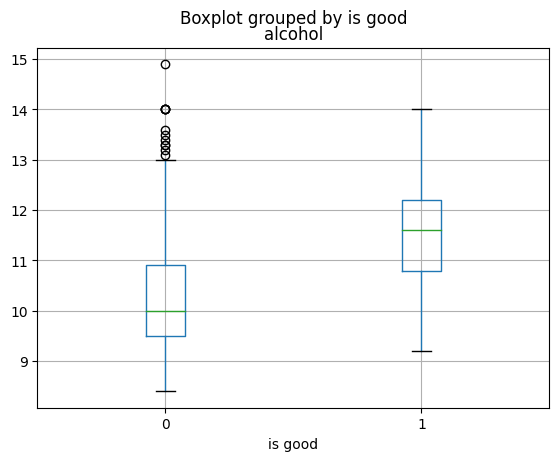

In [10]:
for f in features:
    df.boxplot(column=f, by=output)
    plt.title(f)
plt.show()

In [11]:
X = df[features].values
y = df[output].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)
print('Training size: {}, Testing size: {}'.format(X_train.size,X_test.size))

Training size: 12309, Testing size: 5280


In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize
from scipy.interpolate import interp1d
from sklearn.exceptions import NotFittedError

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Importing Models
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.neighbors import KNeighborsClassifier as KNN #K-Nearest Neighbors
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier #Random Forest Classifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For Classification Results
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [13]:
def get_probabilty_output(X_test, model_fitted, value_count=10):
    def highlight_max(data, color='yellow'):
        attr = 'background-color: {}'.format(color)
        if data.ndim == 1:  # Series from .apply(axis=0) or axis=1
            is_max = data == data.max()
            return [attr if v else '' for v in is_max]
        else:  # from .apply(axis=None)
            is_max = data == data.max().max()
            return pd.DataFrame(np.where(is_max, attr, ''), index=data.index, columns=data.columns)
        
    y_scores = model_fitted.predict_proba(X_test)
    prob_df = pd.DataFrame(y_scores*100).head(value_count)
    styled_df = prob_df.style.background_gradient(cmap='Reds')
    styled_df = styled_df.highlight_max(axis=1, color='green')
    return styled_df

def get_classification_report(y_test,predictions,average="macro"):
    #Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True)
    plt.title("Confusion Matrix")
    
    acc = accuracy_score(y_test, predictions)
    pre = precision_score(y_test, predictions, average=average)
    rec = recall_score(y_test, predictions, average=average)
    # Prediction Report
    print(classification_report(y_test, predictions, digits=3))
    print("Overall Accuracy:", acc)
    print("Overall Precision:", pre)
    print("Overall Recall:", rec)
    
    return acc,pre,rec

def get_classification_ROC(X,y,model,test_size,model_fitted=False,random_state=0):
    
    def check_fitted(clf): 
        return hasattr(clf, "classes_")
    
    if(len(np.unique(y)) == 2):
        #Binary Classifier
        if not check_fitted(model):
            model = model.fit(X,y)
        
        plot_roc_curve(model, X, y)
        y_score = model.predict_proba(X)[:, 1]
        fpr, tpr, threshold = roc_curve(y, y_score)
        auc = roc_auc_score(y, y_score)
        return auc
#         print("False Positive Rate: {} \nTrue Positive Rate: {} \nThreshold:{}".format(fpr,tpr,threshold))
    
    else:
         #Multiclass Classifier
        y_bin = label_binarize(y, classes=np.unique(y))
        n_classes = y_bin.shape[1]

        # shuffle and split training and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=test_size, random_state=random_state)

        # Learn to predict each class against the other
        classifier = OneVsRestClassifier(model)
        model_fitted = classifier.fit(X_train, y_train)
        try:
            y_score = model_fitted.decision_function(X_test)
        except:
            y_score = model_fitted.predict_proba(X_test)



        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])


        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
        plt.figure()
        lw = 2
        plt.plot(fpr[2], tpr[2], color='darkorange',
                 lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic averaged')
        plt.legend(loc="lower right")
        plt.show()

        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes
        
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure(figsize=(10,10))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]),
                 color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]),
                 color='navy', linestyle=':', linewidth=4)

        colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'blue', 'purple', 'green'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                     label='ROC curve of class {0} (area = {1:0.2f})'
                     ''.format(i, roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('multi-class ROC (One vs All)')
        plt.legend(loc="lower right")
        plt.show()

def visualisation_through_PCA(X_PCA, y, model_PCA, model_name="Classification Model"):
    X_set, y_set = X_PCA, y
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, model_PCA.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue', 'yellow', 'purple', 'grey')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    c = ListedColormap(('red', 'green', 'blue', 'yellow', 'purple', 'grey'))(i), label = j)
    plt.title(model_name)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

pca = PCA(n_components = 2)
X_train_PCA_2 = pca.fit_transform(X_train)
X_test_PCA_2 = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Variance Explained by each of the Principal Components: {:.{prec}f}% and {:.{prec}f}%, \nTotal Variance Explained: {:.{prec}f}%".format((explained_variance*100)[0],
                                                                                                                                               (explained_variance*100)[1],
                                                                                                                                                  explained_variance.sum()*100,prec=3))

Variance Explained by each of the Principal Components: 28.203% and 17.214%, 
Total Variance Explained: 45.417%


In [14]:
parameters_LR = {
    "solver" : ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
    "penalty" : ('l1', 'l2', 'elasticnet', 'none'),
    "C" : [0.01, 0.1, 1, 10, 1000]
    
}

model_LR = LogisticRegression()
model_LR_with_best_params = GridSearchCV(model_LR, parameters_LR)
model_LR_with_best_params.fit(X_train,y_train)
model_LR_best_params = model_LR_with_best_params.best_params_

C:\Users\Tejas Rokade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
325 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Tejas Rokade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Tejas Rokade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File

In [15]:
model_LR_best_params

{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}

In [16]:
predictions_LR = model_LR_with_best_params.predict(X_test)
print("Predictions:",predictions_LR[:10])
print("Actual:",y_test[:10])

Predictions: [0 0 0 0 0 0 0 0 0 0]
Actual: [1 0 0 0 0 0 0 0 0 0]


In [17]:
get_probabilty_output(X_test=X_test, model_fitted=model_LR_with_best_params, value_count=15)

,0,1
0,58.774323,41.225677
1,95.352543,4.647457
2,98.658668,1.341332
3,98.147085,1.852915
4,60.307612,39.692388
5,98.518535,1.481465
6,96.425692,3.574308
7,70.990024,29.009976
8,84.897189,15.102811
9,91.005425,8.994575


              precision    recall  f1-score   support

           0      0.895     0.969     0.931       415
           1      0.581     0.277     0.375        65

    accuracy                          0.875       480
   macro avg      0.738     0.623     0.653       480
weighted avg      0.853     0.875     0.855       480

Overall Accuracy: 0.875
Overall Precision: 0.7379840505783462
Overall Recall: 0.6227988878591288


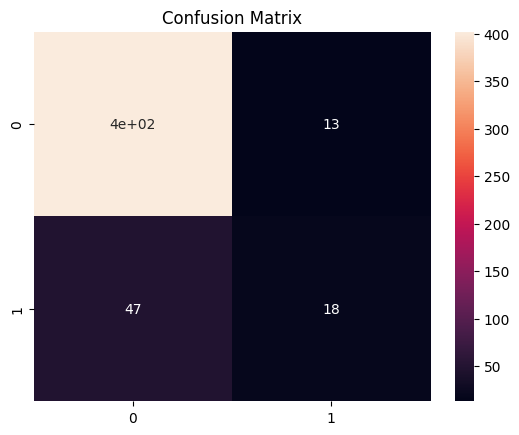

In [18]:
acc_LR,pre_LR,rec_LR = get_classification_report(y_test,predictions_LR)

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Convert to DataFrame
df = pd.read_csv('winequality-red.csv',sep =';')

# Splitting dataset into features and target
X = df.drop(columns=['quality'])
y = df['quality']

# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a dictionary to store results
results = {}

# K-Nearest Neighbors (KNN) Classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
results['KNN'] = knn_accuracy

# Naive Bayes Classifier
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predictions = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
results['Naive Bayes'] = nb_accuracy

# Support Vector Machines (SVMs) Classifier
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
svm_predictions = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
results['SVM'] = svm_accuracy

# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_predictions = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
results['Decision Tree'] = dt_accuracy

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results.values(), index=results.keys(), columns=['Accuracy'])
print(results_df)


               Accuracy
KNN            0.453125
Naive Bayes    0.550000
SVM            0.568750
Decision Tree  0.553125


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# Convert to DataFrame
df = pd.read_csv('winequality-red.csv',sep =';')
# Splitting dataset into features and target
X = df.drop(columns=['quality'])
y = df['quality']
# Splitting dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize a dictionary to store results
results = {}
# Classifiers
classifiers = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(kernel='linear'),
    'Decision Tree': DecisionTreeClassifier()
}
# Iterate through each column
for column in X.columns:
    results[column] = {}
    X_column = X[[column]]
    
    # Splitting dataset into training and testing sets
    X_train_col, X_test_col, _, _ = train_test_split(X_column, y, test_size=0.2, random_state=42)
    
    # Iterate through each classifier
    for clf_name, clf in classifiers.items():
        clf.fit(X_train_col, y_train)
        predictions = clf.predict(X_test_col)
        accuracy = accuracy_score(y_test, predictions)
        results[column][clf_name] = accuracy

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results)
print(results_df)

               fixed acidity  volatile acidity  citric acid  residual sugar  \
KNN                 0.409375          0.415625     0.431250         0.43125   
Naive Bayes         0.415625          0.481250     0.440625         0.40625   
SVM                 0.406250          0.478125     0.443750         0.40625   
Decision Tree       0.387500          0.490625     0.450000         0.46250   

               chlorides  free sulfur dioxide  total sulfur dioxide   density  \
KNN             0.334375             0.393750              0.387500  0.387500   
Naive Bayes     0.425000             0.471875              0.496875  0.471875   
SVM             0.406250             0.406250              0.500000  0.406250   
Decision Tree   0.396875             0.446875              0.453125  0.446875   

                     pH  sulphates   alcohol  
KNN            0.343750   0.362500  0.384375  
Naive Bayes    0.396875   0.459375  0.512500  
SVM            0.406250   0.450000  0.556250  
Decision T

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('winequality-red.csv',sep =';')  # Make sure to replace "your_dataset.csv" with the actual filename

# Split the data into features and target variable
X = data.drop(columns=['quality'])  # Features
y = data['quality']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (k) as per your choice

# Train the KNN classifier
knn.fit(X_train_scaled, y_train)

# Predict the test set labels
y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.546875


In [34]:
# Predicted class
predicted_class = knn.predict(X_test_scaled)

# Probability estimates for each class (optional)
probability_estimates = knn.predict_proba(X_test_scaled)

# Nearest neighbors
nearest_neighbors = knn.kneighbors(X_test_scaled, n_neighbors=5, return_distance=False)

# Accuracy metrics
accuracy_metrics = {
    "Accuracy": accuracy,
    # You can add more metrics like precision, recall, F1-score, etc.
}

# Visualization (optional)
# You can visualize the results as needed, such as plotting the predicted vs. actual labels, confusion matrix, etc.

# Print results
print("Predicted Class:", predicted_class)
print("Probability Estimates (optional):", probability_estimates)
print("Nearest Neighbors:", nearest_neighbors)
print("Accuracy Metrics:", accuracy_metrics)


Predicted Class: [5 5 6 6 6 5 5 5 6 6 7 6 6 5 5 7 5 5 7 5 4 6 5 6 5 6 6 6 5 6 5 5 5 5 5 5 6
 6 5 5 6 5 6 5 6 6 7 6 5 5 5 5 6 7 5 5 6 5 6 5 6 5 5 5 7 6 6 6 7 5 6 6 6 5
 6 5 7 5 6 7 5 7 5 5 6 6 5 6 7 6 6 5 5 6 5 5 5 6 5 6 6 5 6 6 6 6 6 5 5 5 7
 5 6 5 5 6 5 5 5 6 6 5 6 5 5 6 6 5 5 5 6 5 5 6 5 5 5 5 5 6 6 6 5 5 6 5 5 3
 6 5 6 6 5 5 6 6 5 5 5 6 5 6 6 5 5 6 5 5 5 5 5 5 5 6 5 6 6 5 6 5 5 7 6 7 5
 6 6 6 7 6 6 6 5 7 6 5 5 6 5 6 6 5 5 5 6 6 5 5 5 5 7 5 6 6 6 7 6 5 6 6 6 6
 7 6 6 5 6 7 6 5 6 4 6 6 5 6 5 6 6 5 6 5 6 6 5 5 5 5 6 5 5 5 6 5 5 5 5 5 5
 7 7 6 5 7 6 7 6 5 5 6 5 6 5 6 6 5 6 6 6 6 7 6 5 5 5 6 5 6 6 6 5 6 5 6 5 6
 5 7 6 7 6 5 6 5 6 5 6 6 6 7 6 5 6 5 5 6 5 6 6 6]
Probability Estimates (optional): [[0.  0.  0.8 0.2 0.  0. ]
 [0.  0.  0.8 0.2 0.  0. ]
 [0.  0.  0.4 0.6 0.  0. ]
 ...
 [0.  0.  0.4 0.6 0.  0. ]
 [0.  0.  0.  0.8 0.2 0. ]
 [0.  0.  0.4 0.6 0.  0. ]]
Nearest Neighbors: [[ 750  126  962 1050  733]
 [ 321  315  448 1090  414]
 [ 440  285  667   34 1116]
 ...
 [1166  552  109 1021 1

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('winequality-red.csv',sep =';')

# Loop through each column as the target variable
for target_column in data.columns:
    if target_column != 'quality':  # Exclude 'quality' column as it's our target variable
        print(f"\nTarget variable: {target_column}")
        
        # Separate features and target variable
        X = data.drop(target_column, axis=1)
        y = data[target_column]
        
        # Convert target variable to categorical
        y = pd.cut(y, bins=3, labels=False)  # Adjust the number of bins as needed
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        # Standardize features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Initialize SVM classifier
        svm_classifier = SVC(kernel='linear')
        
        # Train the SVM classifier
        svm_classifier.fit(X_train_scaled, y_train)
        
        # Make predictions
        y_pred = svm_classifier.predict(X_test_scaled)
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy:", accuracy)
        print("\nClassification Report:\n", classification_report(y_test, y_pred))
        print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



Target variable: fixed acidity
Accuracy: 0.896875

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       198
           1       0.88      0.82      0.85       111
           2       0.62      0.73      0.67        11

    accuracy                           0.90       320
   macro avg       0.81      0.83      0.82       320
weighted avg       0.90      0.90      0.90       320


Confusion Matrix:
 [[188  10   0]
 [ 15  91   5]
 [  0   3   8]]

Target variable: volatile acidity
Accuracy: 0.76875

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83       216
           1       0.65      0.60      0.63       103
           2       0.00      0.00      0.00         1

    accuracy                           0.77       320
   macro avg       0.49      0.48      0.49       320
weighted avg       0.76      0.77      0.76       320


Confusion Matrix:

C:\Users\Tejas Rokade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tejas Rokade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tejas Rokade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Accuracy: 0.9875

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       316
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2

    accuracy                           0.99       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.98      0.99      0.98       320


Confusion Matrix:
 [[316   0   0]
 [  2   0   0]
 [  2   0   0]]

Target variable: free sulfur dioxide
Accuracy: 0.809375

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       255
           1       0.55      0.19      0.28        59
           2       1.00      0.33      0.50         6

    accuracy                           0.81       320
   macro avg       0.79      0.49      0.56       320
weighted avg       0.78      0.81      0.77       320


Confusion Matrix:
 [[246   9   0]
 [ 48  11   0

C:\Users\Tejas Rokade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tejas Rokade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tejas Rokade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

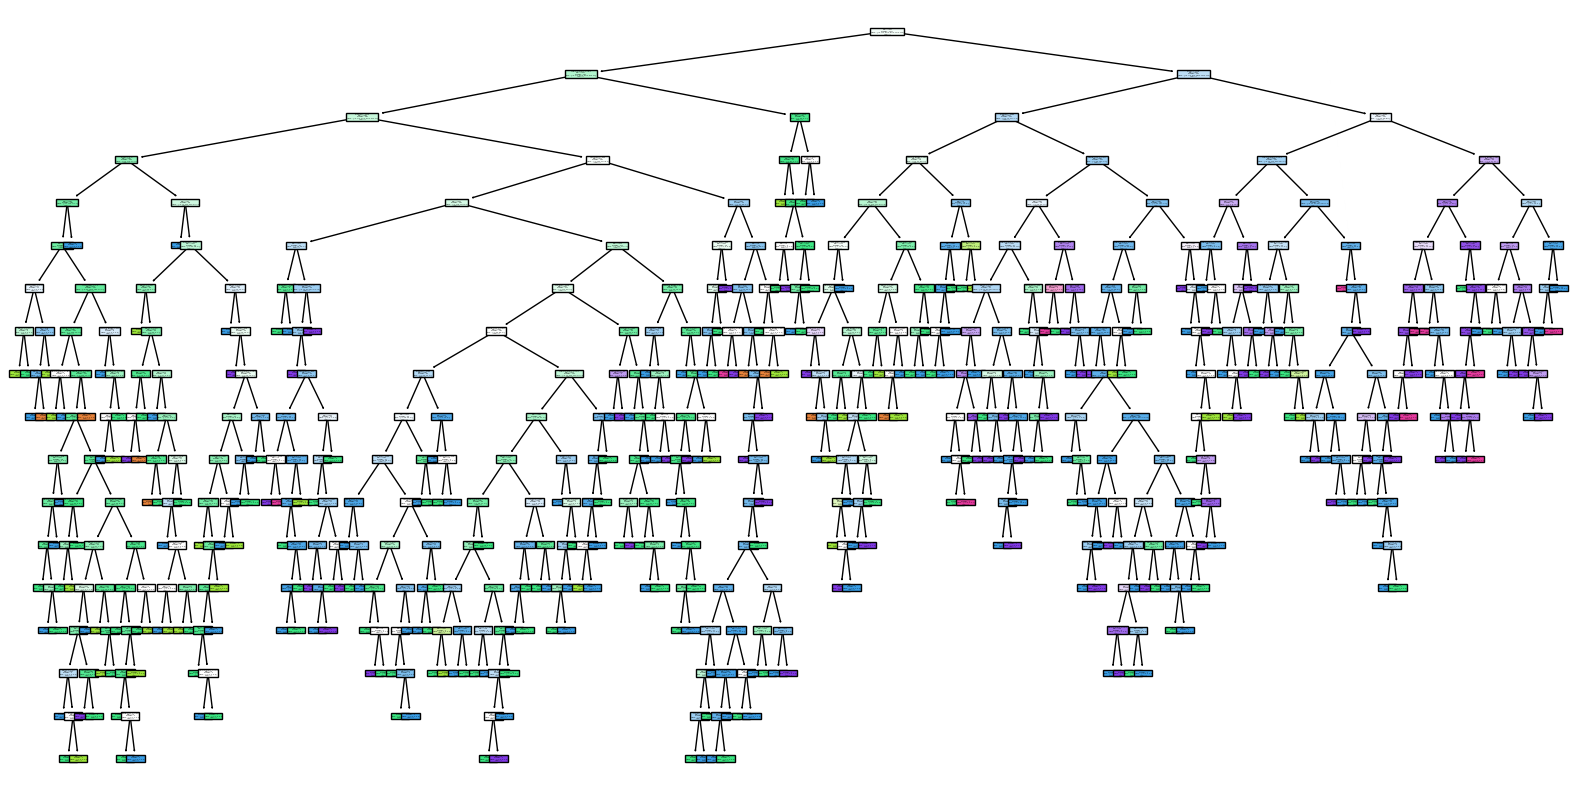

                 Feature  Importance
10               alcohol    0.178035
9              sulphates    0.109806
7                density    0.103983
6   total sulfur dioxide    0.098286
1       volatile acidity    0.088539
4              chlorides    0.079945
2            citric acid    0.079002
8                     pH    0.071373
3         residual sugar    0.066926
0          fixed acidity    0.065299
5    free sulfur dioxide    0.058806


In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('winequality-red.csv',sep =';')  # Replace "your_dataset.csv" with the path to your dataset file

# Separate features and target variable
X = data.drop(columns=['quality'])  # Features
y = data['quality']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Visualize the decision tree (optional)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=["3", "4", "5", "6", "7", "8", "9"], filled=True)
plt.show()

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)



Target variable: fixed acidity
Accuracy: 0.80625
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.90      0.89       198
           1       0.76      0.64      0.70       111
           2       0.36      0.73      0.48        11

    accuracy                           0.81       320
   macro avg       0.67      0.76      0.69       320
weighted avg       0.82      0.81      0.81       320



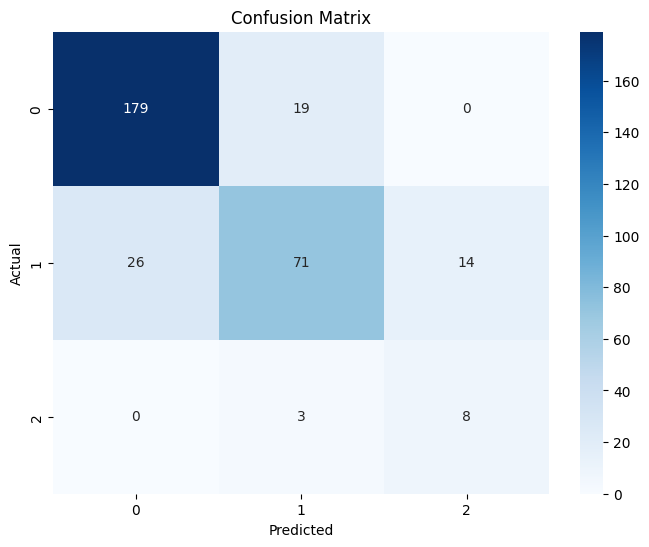


Target variable: volatile acidity
Accuracy: 0.690625
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.69      0.75       216
           1       0.51      0.71      0.60       103
           2       0.00      0.00      0.00         1

    accuracy                           0.69       320
   macro avg       0.45      0.46      0.45       320
weighted avg       0.73      0.69      0.70       320



C:\Users\Tejas Rokade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tejas Rokade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tejas Rokade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

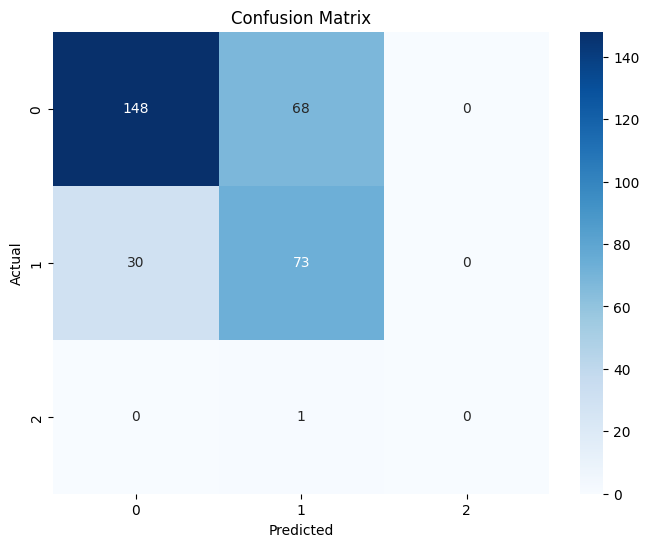


Target variable: citric acid
Accuracy: 0.796875
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       200
           1       0.76      0.68      0.72       114
           2       0.10      0.17      0.12         6

    accuracy                           0.80       320
   macro avg       0.57      0.58      0.57       320
weighted avg       0.80      0.80      0.80       320



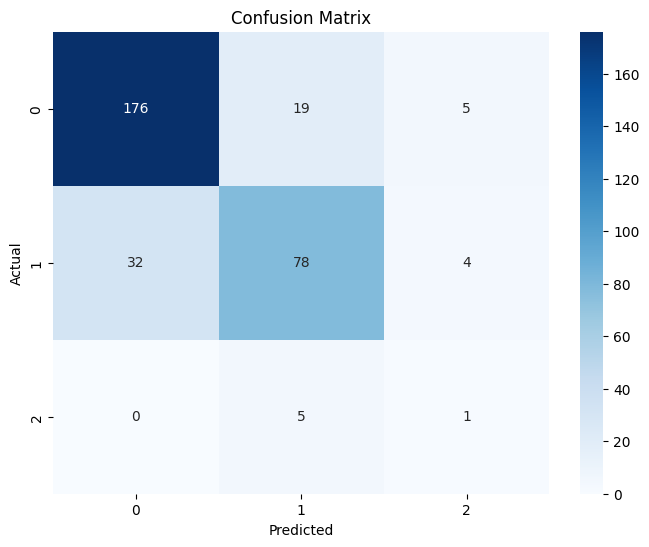


Target variable: residual sugar
Accuracy: 0.940625
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       308
           1       0.30      0.30      0.30        10
           2       0.00      0.00      0.00         2

    accuracy                           0.94       320
   macro avg       0.42      0.42      0.42       320
weighted avg       0.95      0.94      0.94       320



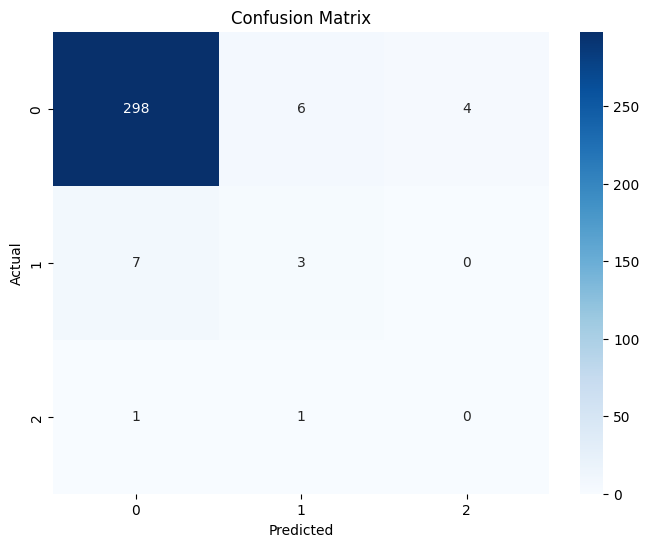


Target variable: chlorides
Accuracy: 0.96875
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       316
           1       0.00      0.00      0.00         2
           2       0.67      1.00      0.80         2

    accuracy                           0.97       320
   macro avg       0.55      0.66      0.60       320
weighted avg       0.99      0.97      0.98       320



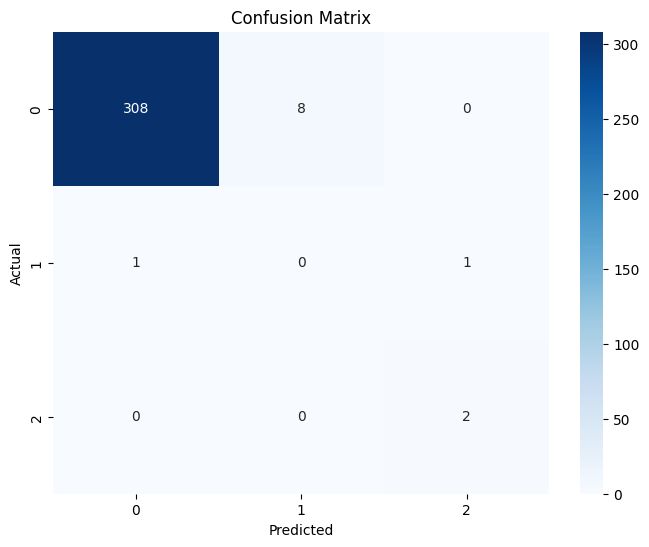


Target variable: free sulfur dioxide
Accuracy: 0.78125
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       255
           1       0.38      0.17      0.24        59
           2       0.17      0.17      0.17         6

    accuracy                           0.78       320
   macro avg       0.46      0.42      0.43       320
weighted avg       0.74      0.78      0.75       320



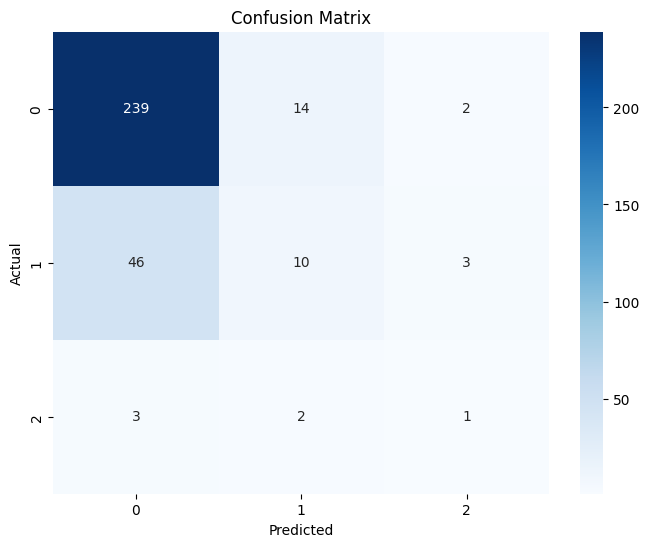


Target variable: total sulfur dioxide
Accuracy: 0.928125
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       300
           1       0.42      0.58      0.49        19
           2       1.00      1.00      1.00         1

    accuracy                           0.93       320
   macro avg       0.80      0.84      0.82       320
weighted avg       0.94      0.93      0.93       320



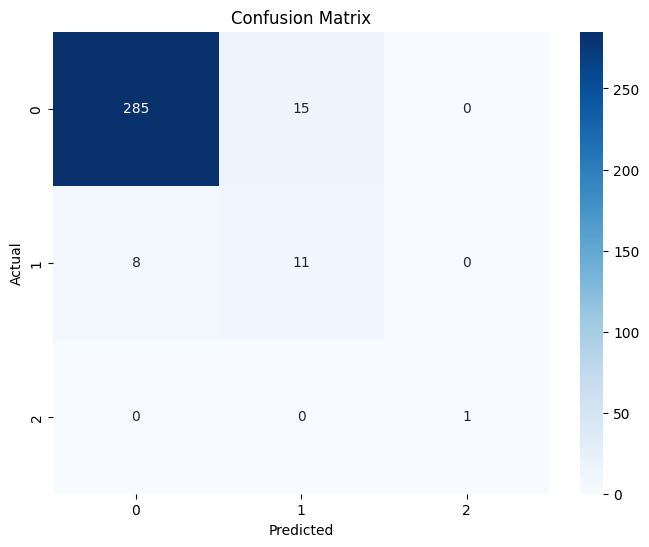


Target variable: density
Accuracy: 0.834375
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75        39
           1       0.90      0.88      0.89       244
           2       0.54      0.59      0.56        37

    accuracy                           0.83       320
   macro avg       0.72      0.75      0.74       320
weighted avg       0.84      0.83      0.84       320



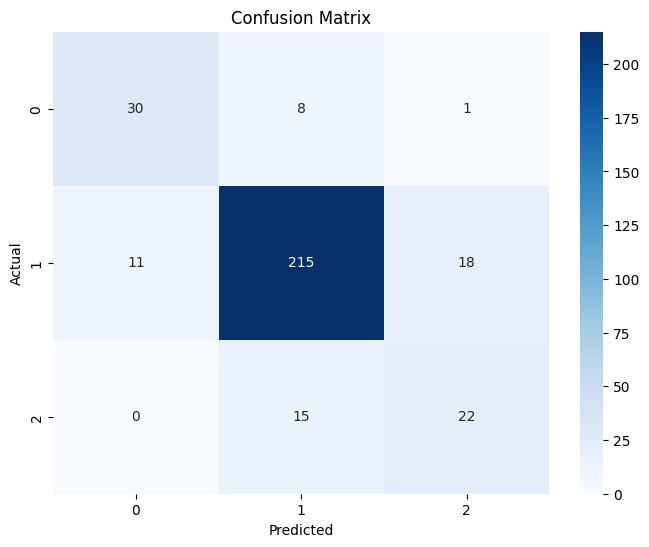


Target variable: pH
Accuracy: 0.790625
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.52      0.58        50
           1       0.88      0.86      0.87       257
           2       0.21      0.46      0.29        13

    accuracy                           0.79       320
   macro avg       0.58      0.61      0.58       320
weighted avg       0.81      0.79      0.80       320



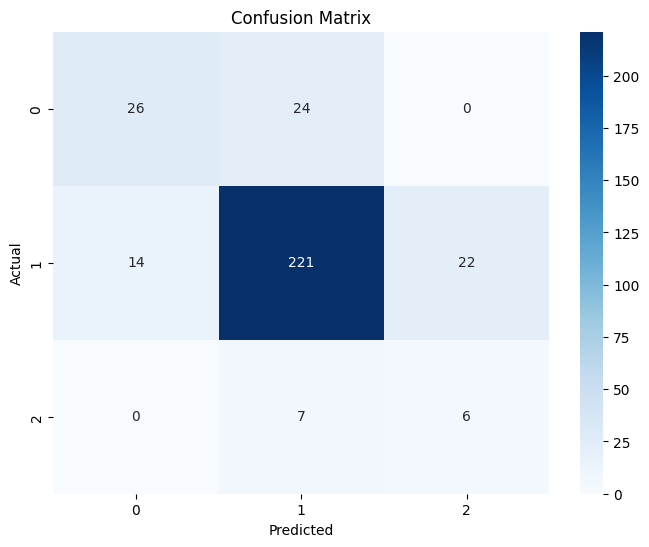


Target variable: sulphates
Accuracy: 0.93125
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       299
           1       0.50      0.24      0.32        21
           2       0.00      0.00      0.00         0

    accuracy                           0.93       320
   macro avg       0.48      0.41      0.43       320
weighted avg       0.92      0.93      0.92       320



C:\Users\Tejas Rokade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tejas Rokade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Tejas Rokade\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

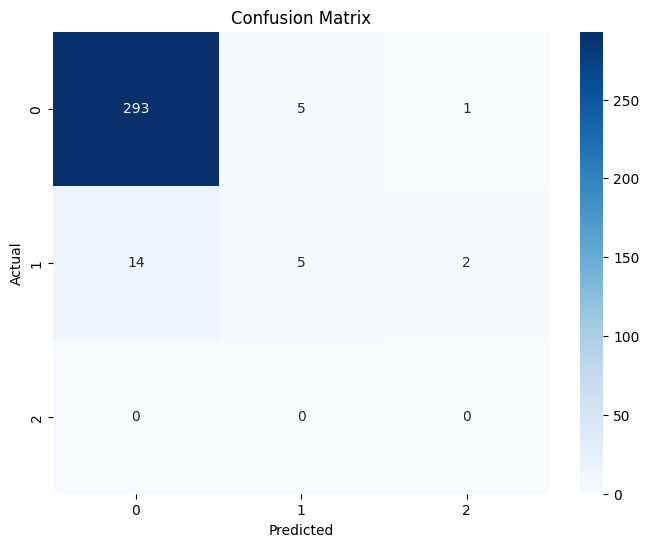


Target variable: alcohol
Accuracy: 0.671875
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.60      0.71       197
           1       0.52      0.83      0.64       109
           2       0.67      0.43      0.52        14

    accuracy                           0.67       320
   macro avg       0.68      0.62      0.62       320
weighted avg       0.73      0.67      0.68       320



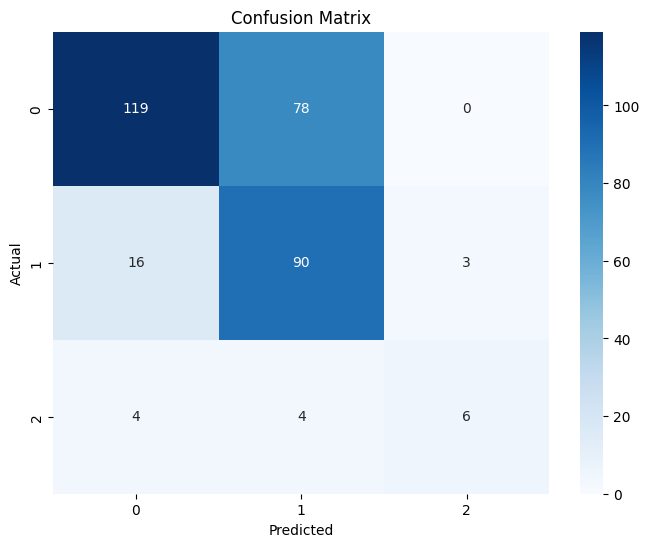

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('winequality-red.csv',sep =';')  # Assuming the data is stored in a file named 'wine_data.csv'

for target_column in data.columns:
    if target_column != 'quality':  # Exclude 'quality' column as it's our target variable
        print(f"\nTarget variable: {target_column}")
        X = data.drop(target_column, axis=1)
        y = data[target_column]
        
        # Convert target variable to categorical
        y = pd.cut(y, bins=3, labels=False)  # Adjust the number of bins as needed
        
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = GaussianNB()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy:", accuracy)

        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()


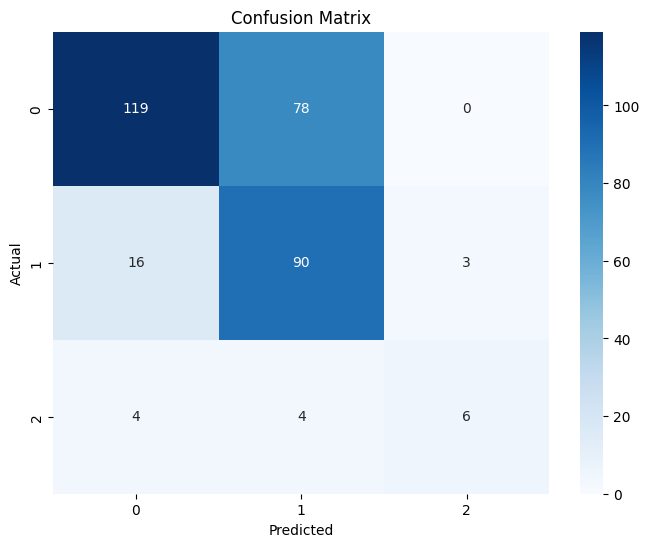

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
